### Day 2: NYC High School Directory Analysis


In [78]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


**1**: Load and preview the dataset

In [81]:
df = pd.read_csv("high-school-directory.csv")
df.head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Council District,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


**2**: Clean column names (lowercase, replace spaces with underscores 
& remove special characters
)

In [99]:
# convert to lowercase & remove '-'
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace(r'[^a-z0-9_]', '', regex=True)
df.columns

Index(['dbn', 'school_name', 'borough', 'building_code', 'phone_number',
       'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min',
       'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city',
       'state_code', 'postcode', 'website', 'total_students', 'campus_name',
       'school_type', 'overview_paragraph', 'program_highlights',
       'language_classes', 'advancedplacement_courses', 'online_ap_courses',
       'online_language_courses', 'extracurricular_activities',
       'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed',
       'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered',
       'partner_cultural', 'partner_nonprofit', 'partner_corporate',
       'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2',
       'start_time', 'end_time', 'se_services', 'ell_programs',
       'school_accessibility_description', 'number_programs', 'priority01',
       'priority02', 'priority03', 'priority04', 'prior

**3**: Filter the dataset to include only schools located in Brooklyn


In [104]:
brooklyn_schools = df[df["borough"] == "Brooklyn"]

# Answers


### Q: How many schools are in Brooklyn?

In [105]:
brooklyn_schools.describe()
# let's find the max_count for unique values to identify pk key (candidates)

counts = brooklyn_schools.nunique()
max_count = max(counts)
key_candid = counts[counts == max_count].index
key_candid

Index(['dbn', 'school_name', 'overview_paragraph', 'program_highlights',
       'extracurricular_activities'],
      dtype='object')

In [106]:
total_schools_brooklyn = brooklyn_schools["dbn"].nunique()
total_schools_brooklyn

121

### A: **121** schools

---

### Q: How many schools in Brooklyn offer Grade 9 entry?

In [107]:
grade9 = brooklyn_schools[
    (brooklyn_schools["grade_span_min"] > 0) & (brooklyn_schools["grade_span_max"] >= 9)
    ]
grade9_count_brooklyn = brooklyn_schools["dbn"].nunique()
grade9_count_brooklyn




121

### A: All 121 schools offer Grade 9 entry.

---

# Group and summarize

**Count** of schools per borough (again **unique** schools)

In [108]:
schools_per_borough = df.groupby("borough")["dbn"].agg(["nunique"]).sort_values("nunique", ascending=False)
schools_per_borough = schools_per_borough.rename(columns={'nunique': ''})
schools_per_borough

,
borough,
Brooklyn,121
Bronx,118
Manhattan,106
Queens,80
Staten Island,10


**Average** number of students per borough

In [109]:
avg_students_per_borough = df.groupby("borough")["total_students"].agg(["mean"]).sort_values("mean", ascending=False)
avg_students_per_borough = avg_students_per_borough.rename(columns={'mean': ''})
avg_students_per_borough

,
borough,
Staten Island,1847.500000
Queens,1046.644737
Brooklyn,699.134454
Manhattan,589.825243
Bronx,490.406780


Summary of grade_span_max grouped by borough

In [44]:
df.groupby("borough")["grade_span_max"].describe()

,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
Bronx,118.0,11.906780,0.369506,9.0,12.0,12.0,12.0,12.0
Brooklyn,121.0,11.933884,0.381566,9.0,12.0,12.0,12.0,12.0
Manhattan,106.0,11.877358,0.472135,9.0,12.0,12.0,12.0,12.0
Queens,80.0,11.825000,0.497462,10.0,12.0,12.0,12.0,12.0
Staten Island,10.0,12.000000,0.000000,12.0,12.0,12.0,12.0,12.0


---

# Create visualizations

Bar chart: Number of schools per borough

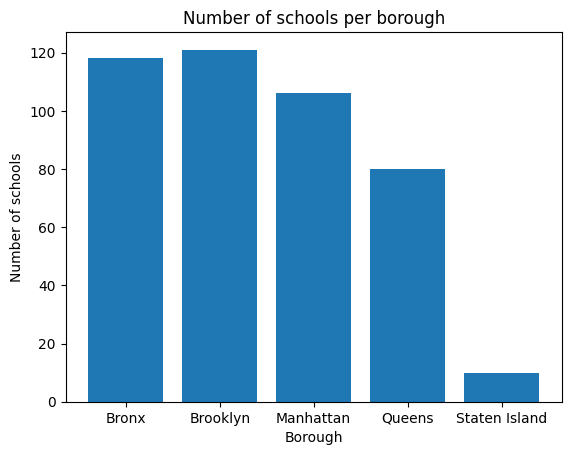

In [73]:
schools_per_borough = df.groupby("borough")["dbn"].agg(["nunique"]).reset_index()
fig, ax = plt.subplots()
plt.title("Number of schools per borough")
plt.ylabel("Number of schools")
plt.xlabel("Borough")
ax.bar(schools_per_borough["borough"],schools_per_borough["nunique"])
plt.show()

---

# Insights

Write 2–3 key insights based on your findings at the end of the notebook

**Insight 1:** Staten Island has the highest average number of students per borough.

**Insight 2:** With a total of 121, Brooklyn has the highest number of unique schools among all boroughs.

**Insight 3:** The maximum grade span across schools is highly consistent in all boroughs, with Staten Island being completely uniform at grade 12 and other boroughs showing minimal variation.